In [71]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

# 線形回帰 (Linear Regression)

まず X と Y のデータを作成します

In [72]:
# -10 から 10 の間で 101 個の点を作成
x = np.linspace(-10, 10, num=101)
x[:10]

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,  -8.2])

求めたい正解の $f(x)$ は以下の式で表される

$$y=5x+10$$

今回はこれにランダムな数字を足したやつをデータにする  
機械がモデルを訓練するために用いるデータを「訓練データ (training data)」と呼ぶ

In [73]:
# 求めたい正解の関数
f = lambda i: 5. * i + 10.

np.random.seed(10)
y = f(x) + 5. * np.random.randn(x.size)
y[:10]

array([-33.34206748, -35.42360513, -45.72700146, -37.04191925,
       -32.89332013, -38.6004278 , -32.67244207, -32.45725737,
       -31.97854285, -31.87300105])

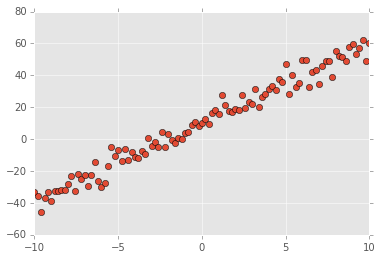

In [74]:
plt.plot(x, y, 'o')

## 最小二乗法を使った線形回帰

科学計算用ライブラリ `scipy` の中に含まれる，最適化を解くためのモジュール `scipy.optimize` を利用します  
`scipy.optimize` モジュールの中には，`scipy.optimize.leastsq` という最小二乗フィッティングを行ってくれる関数があります

$$y - (a * x + b) = 0$$

となるような $a$ と $b$ を探します．実際には $0$ となる点は見つけられないので，より $0$ に近づくように調整する感じです

In [75]:
from scipy import optimize

def fit_func(params, x, y):
    a = params[0]
    b = params[1]
    return y - (a * x + b)

# パラメータの初期化
params = [0., 0.]
result = optimize.leastsq(fit_func, params, args=(x, y))
result

(array([  4.93743797,  10.39896745]), 1)

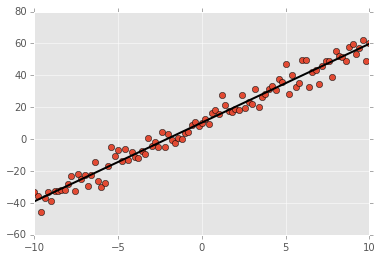

In [76]:
a = result[0][0]
b = result[0][1]

plt.plot(x, y, 'o')
plt.plot(x, [a * i + b for i in x], 'k', linewidth=2)

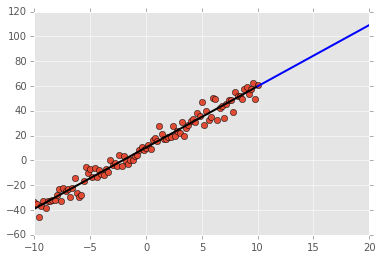

In [77]:
# 新しい x について y を計算してみる

new_x = np.linspace(10, 20, num=100)

plt.plot(x, y, 'o')
plt.plot(x, [a * i + b for i in x], 'k', linewidth=2)
plt.plot(new_x, [a * i + b for i in new_x], 'b', linewidth=2)

## SVR (Support Vector Regression) を使った線形回帰

細かい話はここではしません

ちなみに，scikit-learn は色々は大体以下の形式で書ける

- 訓練: model.fit(X, y)
- 予測: model.predict(new_X) --> predicted_y
- 評価: svr.score(x, predicted_y) (※決定係数)

In [79]:
# 入力の形式がさっきとちょっと違う
x = [[i] for i in x]
x[:10]

[[-10.0],
 [-9.8000000000000007],
 [-9.5999999999999996],
 [-9.4000000000000004],
 [-9.1999999999999993],
 [-9.0],
 [-8.8000000000000007],
 [-8.5999999999999996],
 [-8.4000000000000004],
 [-8.1999999999999993]]

In [80]:
from sklearn import svm

# 線形のカーネルでSVRモデルを作成
svr = svm.SVR(kernel='linear')

# この1行でモデルの訓練ができる
svr.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [81]:
# 傾き
svr.coef_

array([[-4.93833883]])

In [82]:
# 切片
svr.intercept_

array([ 10.29978451])

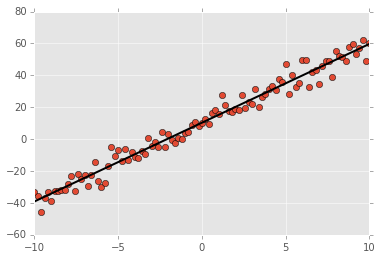

In [83]:
# 予測
predicted_y = svr.predict(x)

plt.plot(x, y, 'o')
plt.plot(x, predicted_y, 'k', linewidth=2)

In [89]:
# 決定係数
svr.score(x, predicted_y)

1.0